# Python Project Proposal

Python can be a useful tool for data analysis and visualization. For just under a year now, I have been compiling and organizing data for my master's thesis. The plan is to use this data and Python in conjunction to further understand my data set, process and analyze it in ways that excel lacks, and create visualizations and statistical analyses that may turn out to be be integral parts of my thesis. 

### Data Background

The data file is in the Project folder and named Gwen_Project_data.xlsx

The data consists of the following variables as they pertain to soybeans:
>Origin Basis: These prices are calculated as the difference between the futures price and the cash price at five locations in the U.S. and five locations in Brazil. 

>Port Basis: These prices are calculated as the difference between the futures price and the cash price at the Pacific North West and Gulf in the U.S. and Santos, Paranagua, and a northern port in Brazil.

>Barge Rates are the cost it takes to get from various locations in the central U.S. to the Gulf ports, be it down the Ohio, Mississippi, and Missouri Rivers.

>Ocean Rates are the prices that enumerate the cost to send a vessel of soybeans from the ports to their destination, Dalian, China. There is one rate for each U.S. port to China, and for Brazil the two rates signify Brazil to China through the Panama Canal and Brazil to China around Cape Hope. They are not port specific, but it is assumed the northern port would be the only one to use the Panama Canal rate, and they may not even do that because of being over vessel size requirements for the canal.

>Daily Car Value is the average of the bid-ask price for shuttle cars from the central midwest out to the PNW port in the U.S.

>FX Rate is the Brazil to U.S. currency exchange rate over time.

>Interior Brazil shipping is not currently respresented in this data set because there is a lack of uniform data or a consistent source of data for this measure coming out of Brazil. Currently in the model the plan is to represent this data using averages based off of the various lengths of historical data and their non-coinciding intervals: weekly, quarterly, and yearly. One hope is that through developing more skill in Python it will be possible to process this variable in particular better than has been performed in excel so far.

>Wait Times: This metric is the average wait for grains at Brazilian ports, meaning that is the time between scheduled delivery and actual delivery. At this point in Brazilian grain buying/selling, a certain number of wait days is expected due to only having medium-size trucks in their country, limited rail capacities, and barge capacities only up north in the Amazon. Realizing this, wait time distributions will be used to calculate expected delay, and then random numbers will be generated. If the actual delay > expected delay, a demurage rate will be applied to the cost of shipping soybeans from Brazil.

In total, these variables more or less represent the cost factors that Chinese soybean buyers face when procuring soybeans for their country. By modeling the variables, it will be predicted when Chinese buyers will prefer U.S. soybeans and when they'll prefer Brazilian soybeans and their associated costs. Therefore, the model will be a least-cost optimization in a time series model.

The Python project will assist in analyzing the model data in more intuitive ways than Excel and @risk may be able to do. 

## Areas of Focus

*Statistical analysis* will be one main area of focus. Statistical functions will be created and used to interpret my variables and compare their underlying statitics. Distributions for the data will be obtained, and they can be compared to the previously constructed @risk functions in order to further validate, or used to reconsider, the distributions in my model. 

Correlation matrices will be useful in modeling the correlation between the similar variables in professional-looking heatmaps. For example, included in this draft is the correlation between Ocean Rates.

*Visualization* will be another key area of focus for the project. @Risk technology only provides very specific ways to output and graph the statistical parameters it generates, whereas those generated in Python will be fully customizable for the purpose of explaining the data in both the thesis document and defense materials. 

Graphing the variables with respect to time will be of use as well. Whether log capabilites are used, or simply just personalizing graphs to make them more professional, the quality of graphs will enhance the final project and thesis later on. Along with graphics, Python can be used to create professional-looking equations as well.

*Futher Calculations* may also prove to be useful. Currently the main one in mind is rate of change. This could be useful for a sensitivity analysis or just further description of the data.

In an early conclusion, I am not fully aware of the true capabilities Python has in relation to my data. It's possible my term project will turn in to something more intuitive and useful than I can even comprehend as of yet.

In [50]:
# word count

import io
import os
from nbformat import current

total_markdown = 0
total_heading = 0
total_code = 0

for root, dirs, files in os.walk("."):
    for file in files:
        if file.endswith(".ipynb") and not file.endswith("checkpoint.ipynb") :
            #print(os.path.join(root, file))
            with io.open(os.path.join(root, file), 'r', encoding='utf-8') as f:
                nb = current.read(f, 'json')

            word_count_markdown = 0
            word_count_heading = 0
            word_count_code = 0
            for cell in nb.worksheets[0].cells:
                if cell.cell_type == "markdown":
                    word_count_markdown += len(cell['source'].replace('#', '').lstrip().split(' '))
                elif cell.cell_type == "heading":
                    word_count_heading += len(cell['source'].replace('#', '').lstrip().split(' '))
                elif cell.cell_type == "code":
                    word_count_code += len(cell['input'].replace('#', '').lstrip().split(' '))
            total_markdown += word_count_markdown
            total_heading += word_count_heading
            total_code += word_count_code

print("{} Words in notebooks' markdown" .format(total_markdown))
print("{} Words in notebooks' heading" .format(total_heading))
print("{} Words in notebooks' code" .format(total_code))

1220 Words in notebooks' markdown
0 Words in notebooks' heading
1822 Words in notebooks' code


# Project Data Visualization

### Origin Basis

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("Origin_Basis_CalculatedcleanedData.csv", index_col = ["Date"])
scatter_cats = ["Ayr, ND", "Alberta, MN", "Jasper, MN", "Ida Grove, IA", "St. Joseph, MO", "Barreirias", "Sorriso", "Rio Verde", "Ponta Grossa", "Rondonopolis"]
select_data = data[scatter_cats]
data[scatter_cats]

,"Ayr, ND","Alberta, MN","Jasper, MN","Ida Grove, IA","St. Joseph, MO",Barreirias,Sorriso,Rio Verde,Ponta Grossa,Rondonopolis
Date,,,,,,,,,,
2013-01-02,-0.5350,-0.2050,-0.4050,-0.3350,0.0850,1.6550,-2.3850,-1.2450,1.0550,-0.8050
2013-01-07,-0.5675,-0.4775,-0.4875,-0.3875,-0.0075,0.3125,-3.4675,-0.9075,0.6325,-2.1775
2013-01-08,-0.6175,-0.5275,-0.5375,-0.4375,-0.0575,-0.2975,-3.5175,-1.7975,-0.2375,-2.4675
2013-01-11,-0.8175,-0.7675,-0.7675,-0.6775,-0.2975,-0.0175,-3.6975,-1.7275,-0.4075,-2.8875
2013-01-14,-0.7175,-0.5675,-0.6675,-0.5775,-0.1975,-0.1575,-3.8775,-2.3975,-0.6475,-2.7475
...,...,...,...,...,...,...,...,...,...,...
2019-12-26,-0.9975,-0.6875,-0.5675,-0.5375,-0.2675,-0.1075,-0.6275,-0.0175,0.0125,-0.2575
2019-12-27,-0.9950,-0.6850,-0.5450,-0.5050,-0.1850,0.0350,-0.5250,0.0850,0.0950,-0.1550
2019-12-30,-0.9950,-0.6450,-0.5450,-0.4950,-0.2050,0.0150,-0.5450,0.0650,0.1650,-0.1750


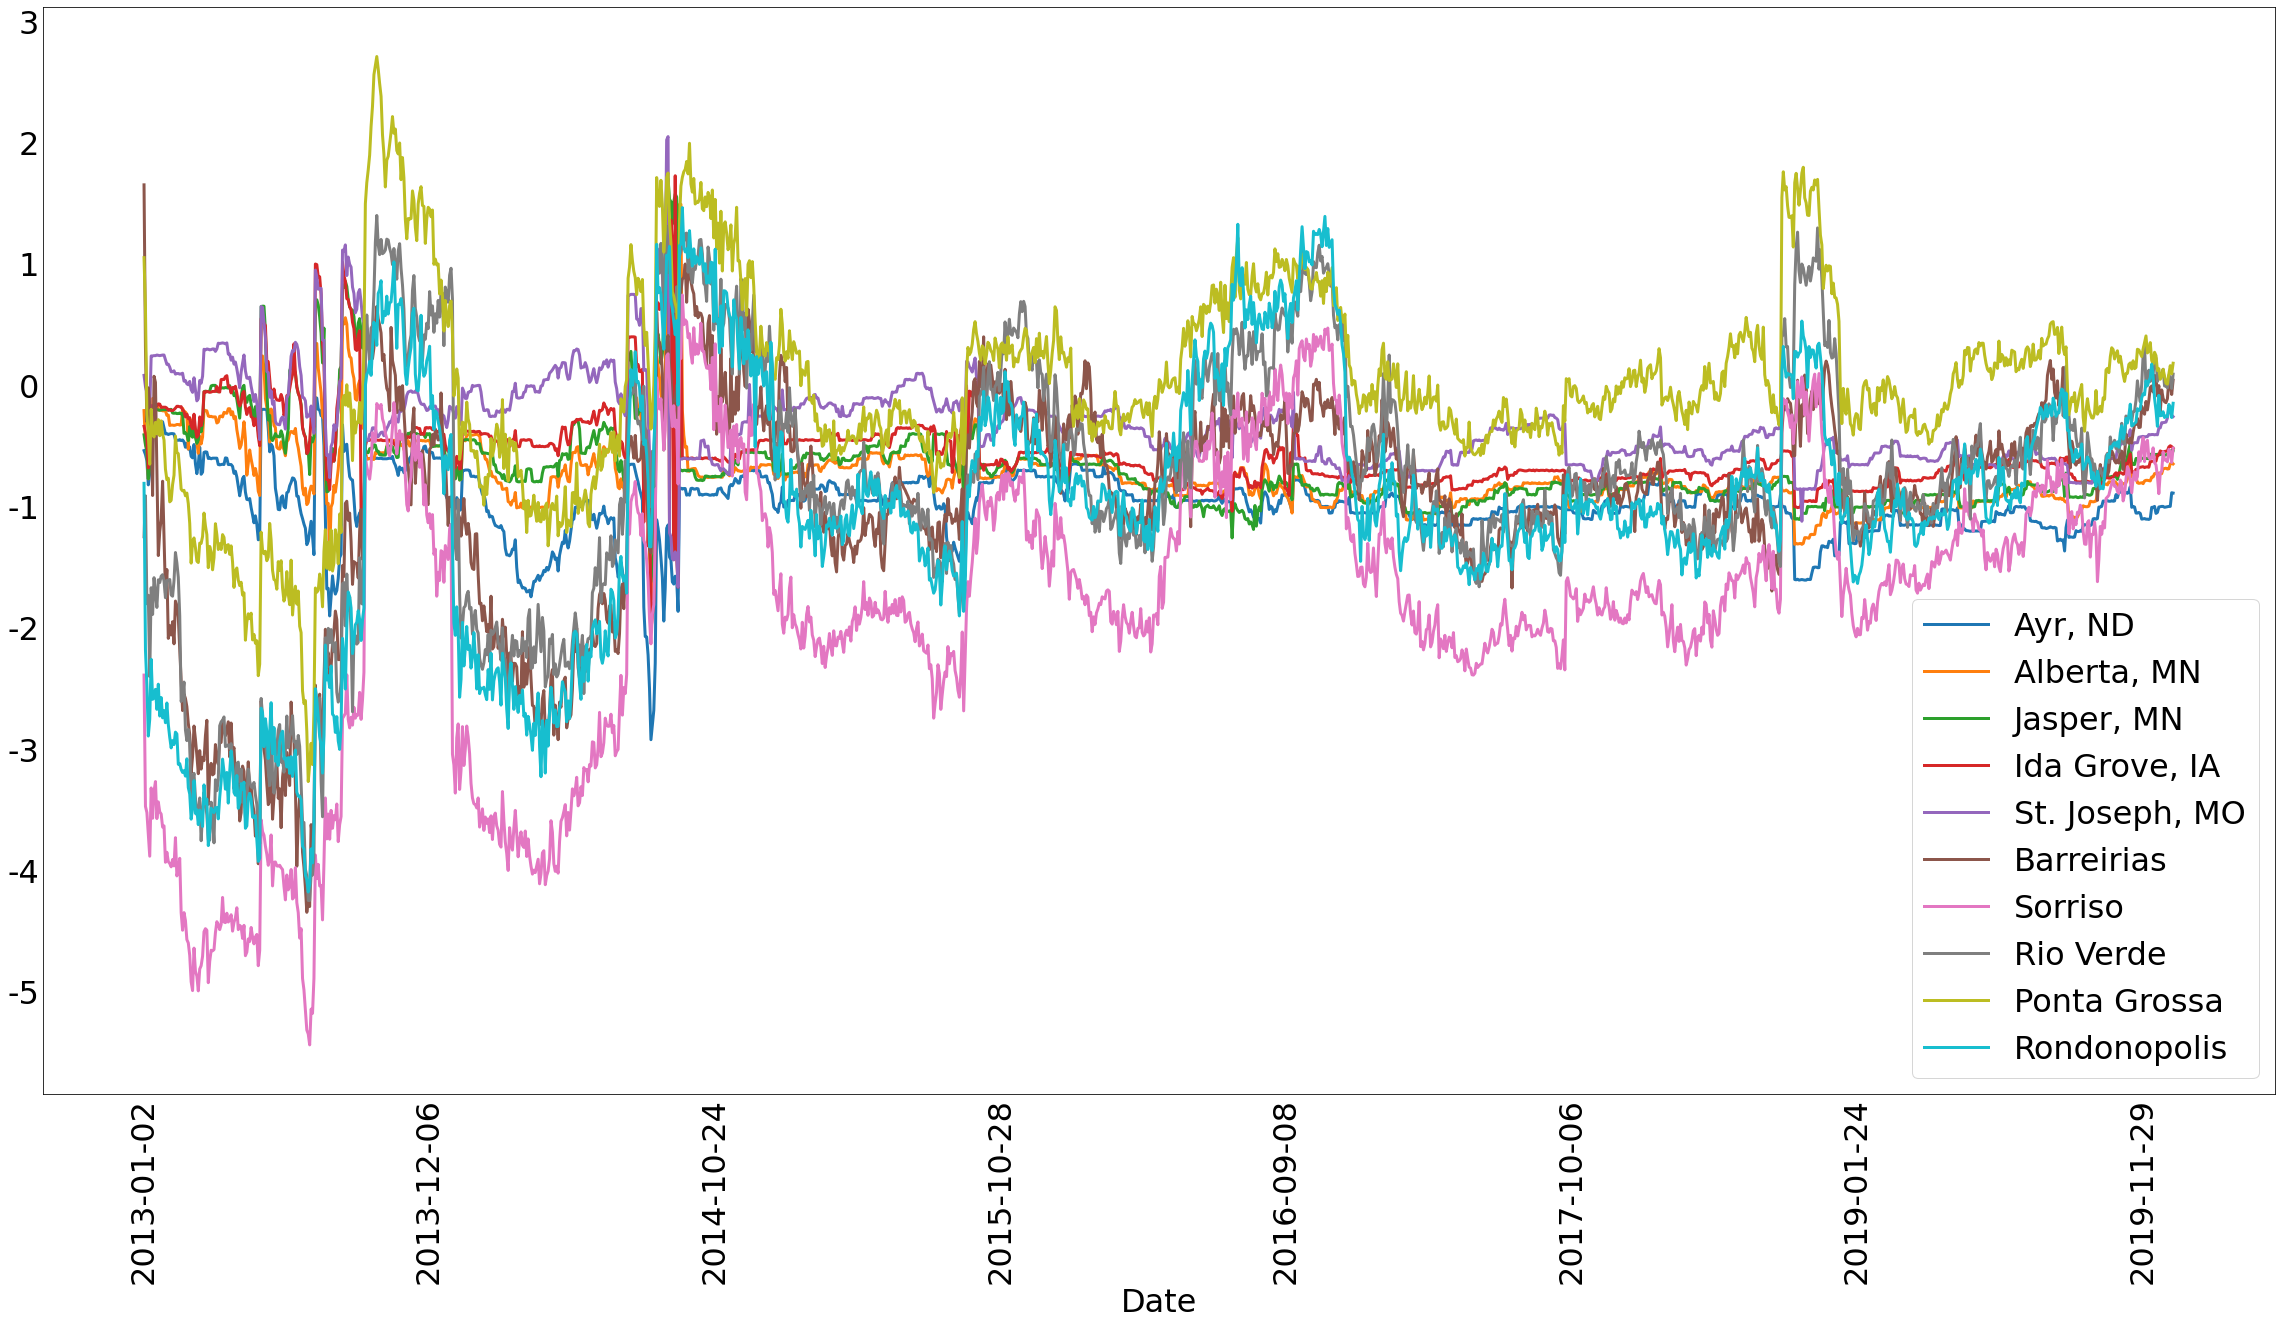

In [20]:
def plot_lines(df, linewidth = 1, figsize = (40,20), pp = None):
    
    fig, ax = plt.subplots(figsize = figsize)    
    # If no secondary_y (axis), plot all variables at once
    df.plot.line(linewidth = linewidth, ax = ax)
    # Turn the text on the x-axis so that it reads vertically
    ax.tick_params(axis='x', rotation=90)
    # Get rid of tick lines perpendicular to the axis for aesthetic
    ax.tick_params('both', length=0, which='both')
    # transform y-axis values from sci notation to integers
    vals = ax.get_yticks()
    ax.set_yticklabels([int(x) for x in vals]) 
    
    # format image filename 
    remove_chars = "[]:$'\\"
    filename = str(list(df.keys()))
    for char in remove_chars:
        filename = filename.replace(char, "")  
    plt.savefig(filename[:50] + " line.png", 
                bbox_inches = "tight")
    #[:50] + " line.png"
    # save image if PdfPages object was passed
    if pp != None: pp.savefig(fig, bbox_inches = "tight")

plt.rcParams.update({"font.size":32})
basis_vars = ["Ayr, ND", "Alberta, MN", "Jasper, MN", "Ida Grove, IA", "St. Joseph, MO", "Barreirias", "Sorriso", "Rio Verde", "Ponta Grossa", "Rondonopolis"]
plot_lines(df = data[basis_vars], linewidth = 3, figsize = (40, 20), pp = None)

For better analysis, the U.S. origin basis data could be split from the Brazil basis data.

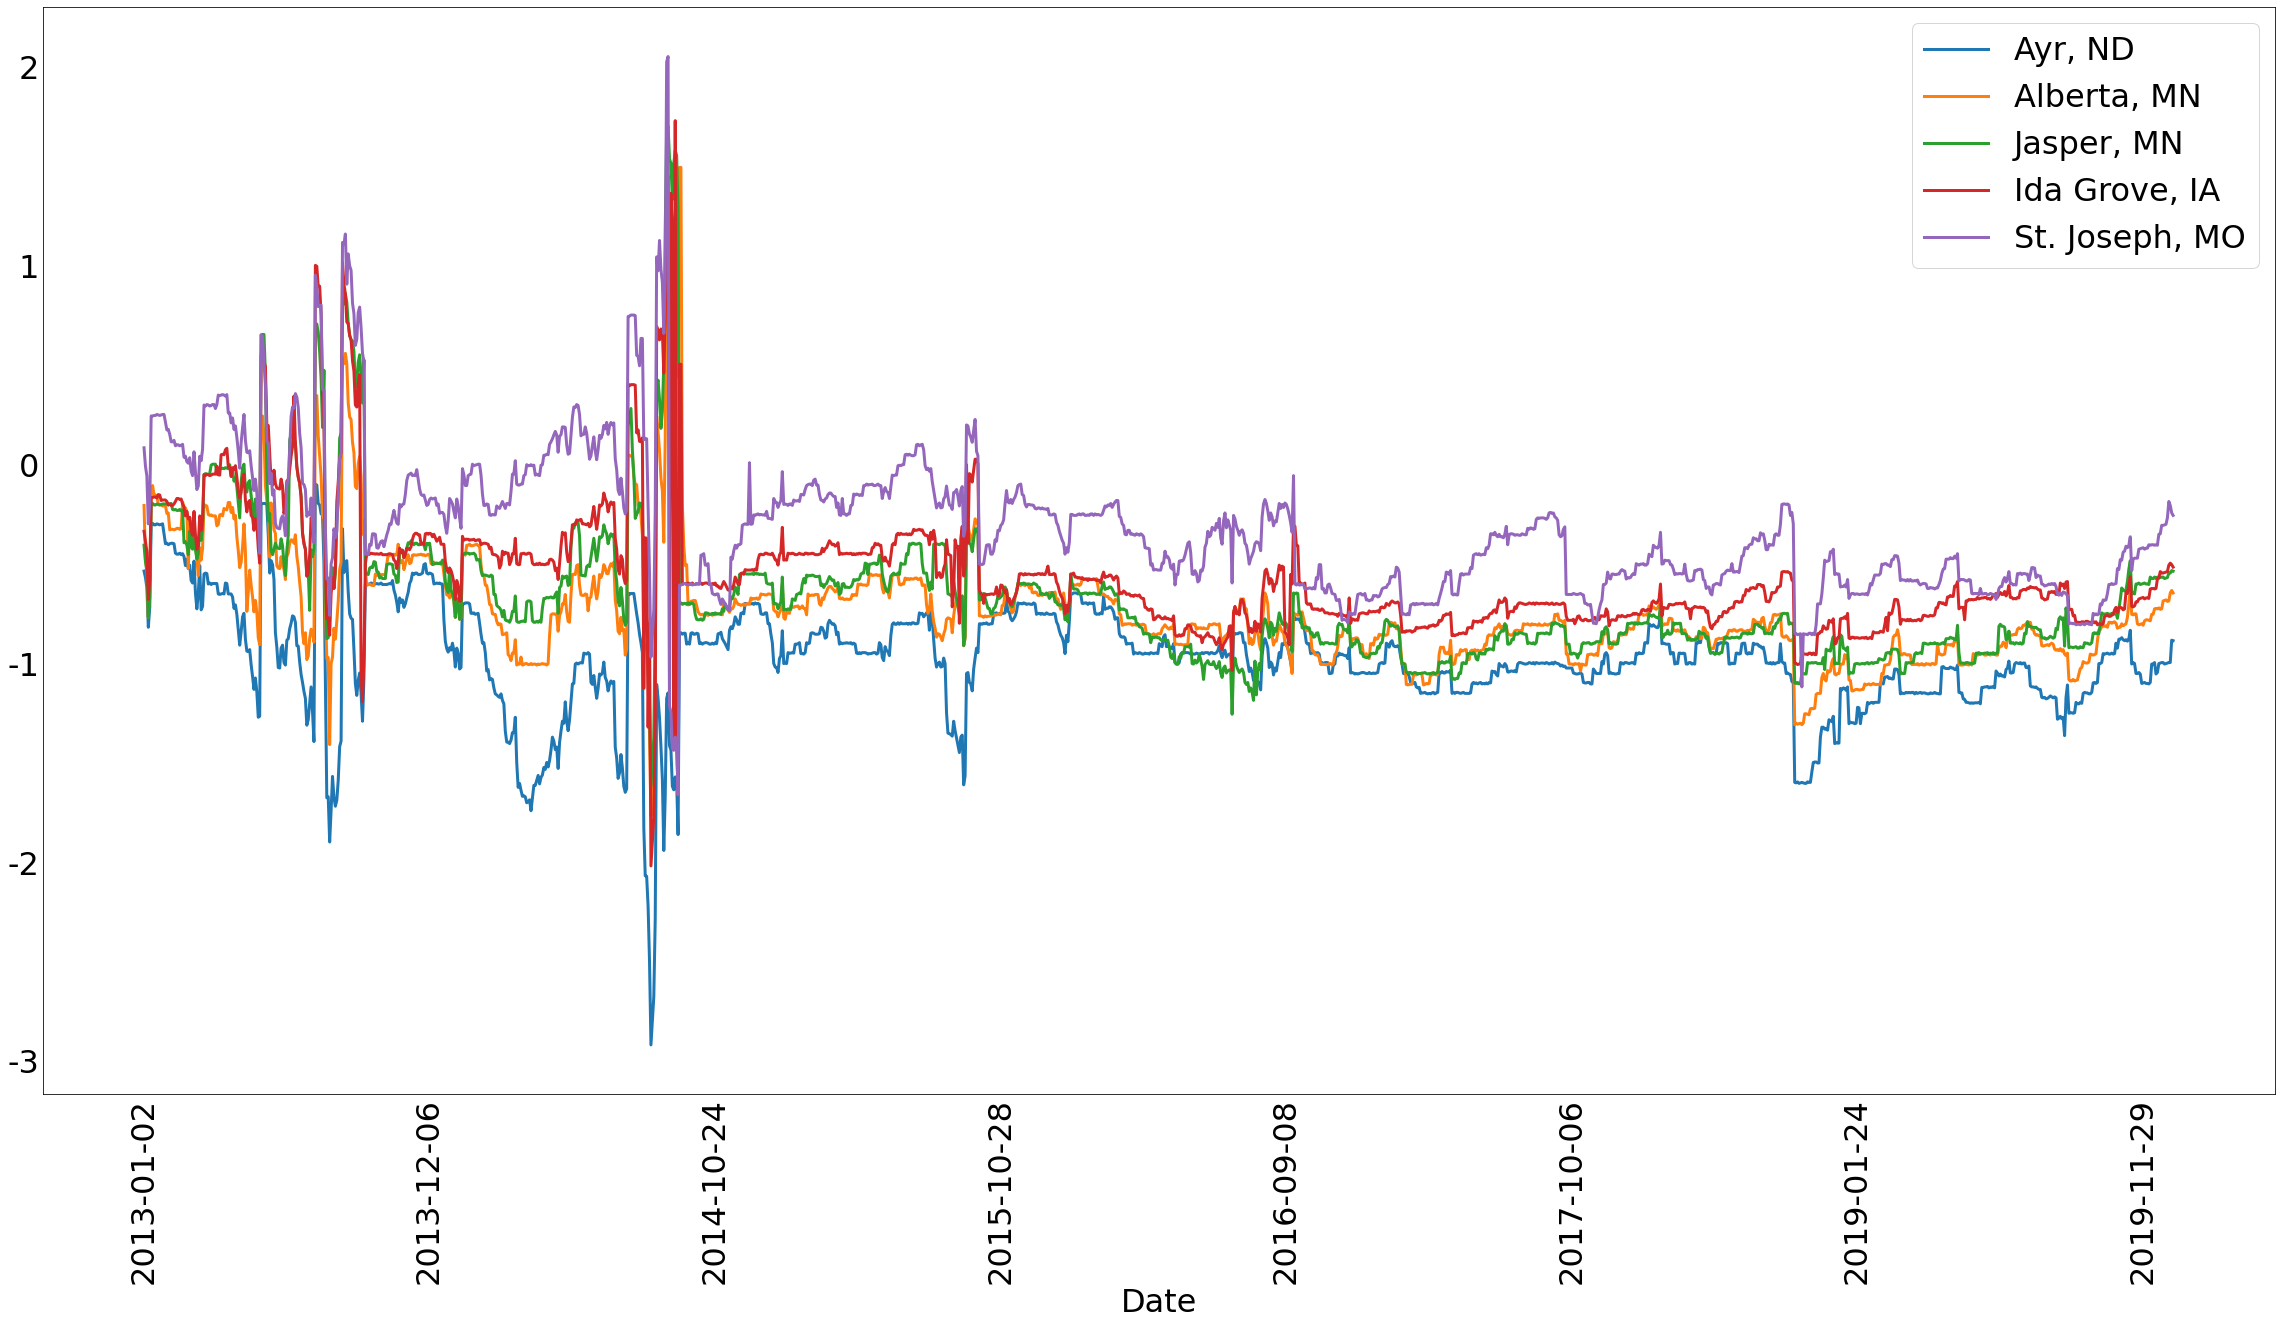

In [21]:
plt.rcParams.update({"font.size":32})
basis_vars = ["Ayr, ND", "Alberta, MN", "Jasper, MN", "Ida Grove, IA", "St. Joseph, MO"]
plot_lines(df = data[basis_vars], linewidth = 3, figsize = (40, 20), pp = None)

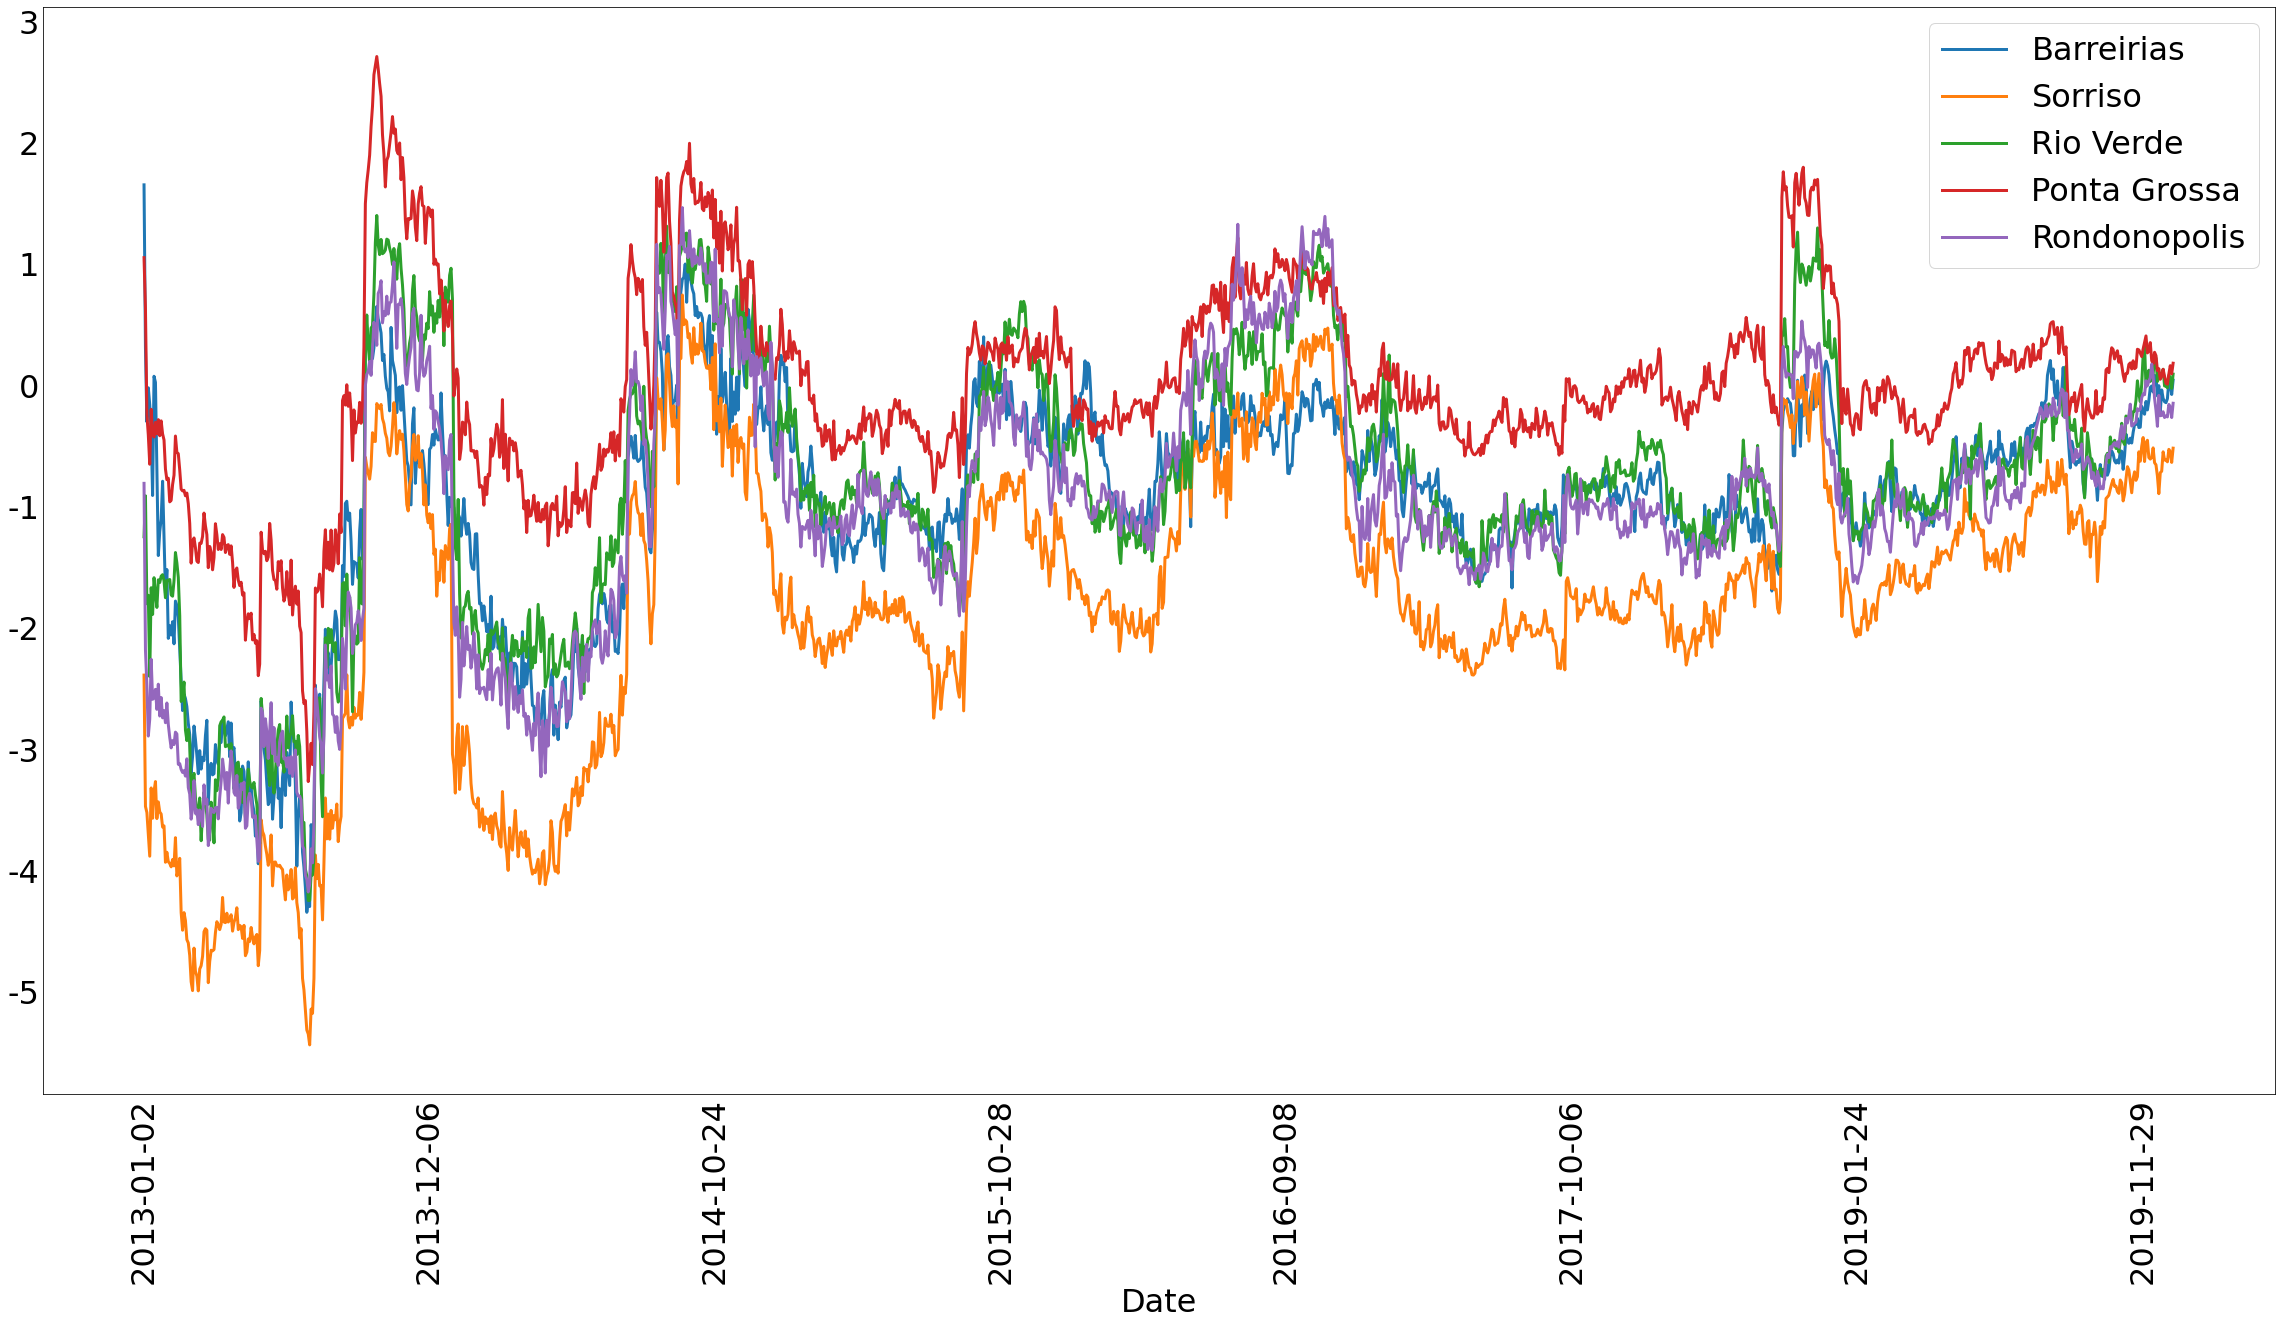

In [9]:
plt.rcParams.update({"font.size":32})
basis_vars = ["Barreirias", "Sorriso", "Rio Verde", "Ponta Grossa", "Rondonopolis"]
plot_lines(df = data[basis_vars], linewidth = 3, figsize = (40, 20), pp = None)

Whether looking at the graph of both countries together, or the separate graphs, it can be inferred that the Brazil basis values were historically more volatile, given the y-axis stretches from -5 dollars to +3. These are huge numbers for a basis and can be explained by the farming super cycle that ocurred and the effects these high futures prices had on local Brazilian farmers whose farming industry was not as big or as streamlined. Since around 2014, Brazilian production has expanded by _%._ Due to this, the country has implemented infrastructure to increase trucking capacity, increase port capacity, start expanding their small rail system, and decrease wait time. Due to having a more stable industry and due to the U.S.-China Trade War, demand for Brazilian soybeans has kept the basis at more stable levels than previous to 2014/2015.

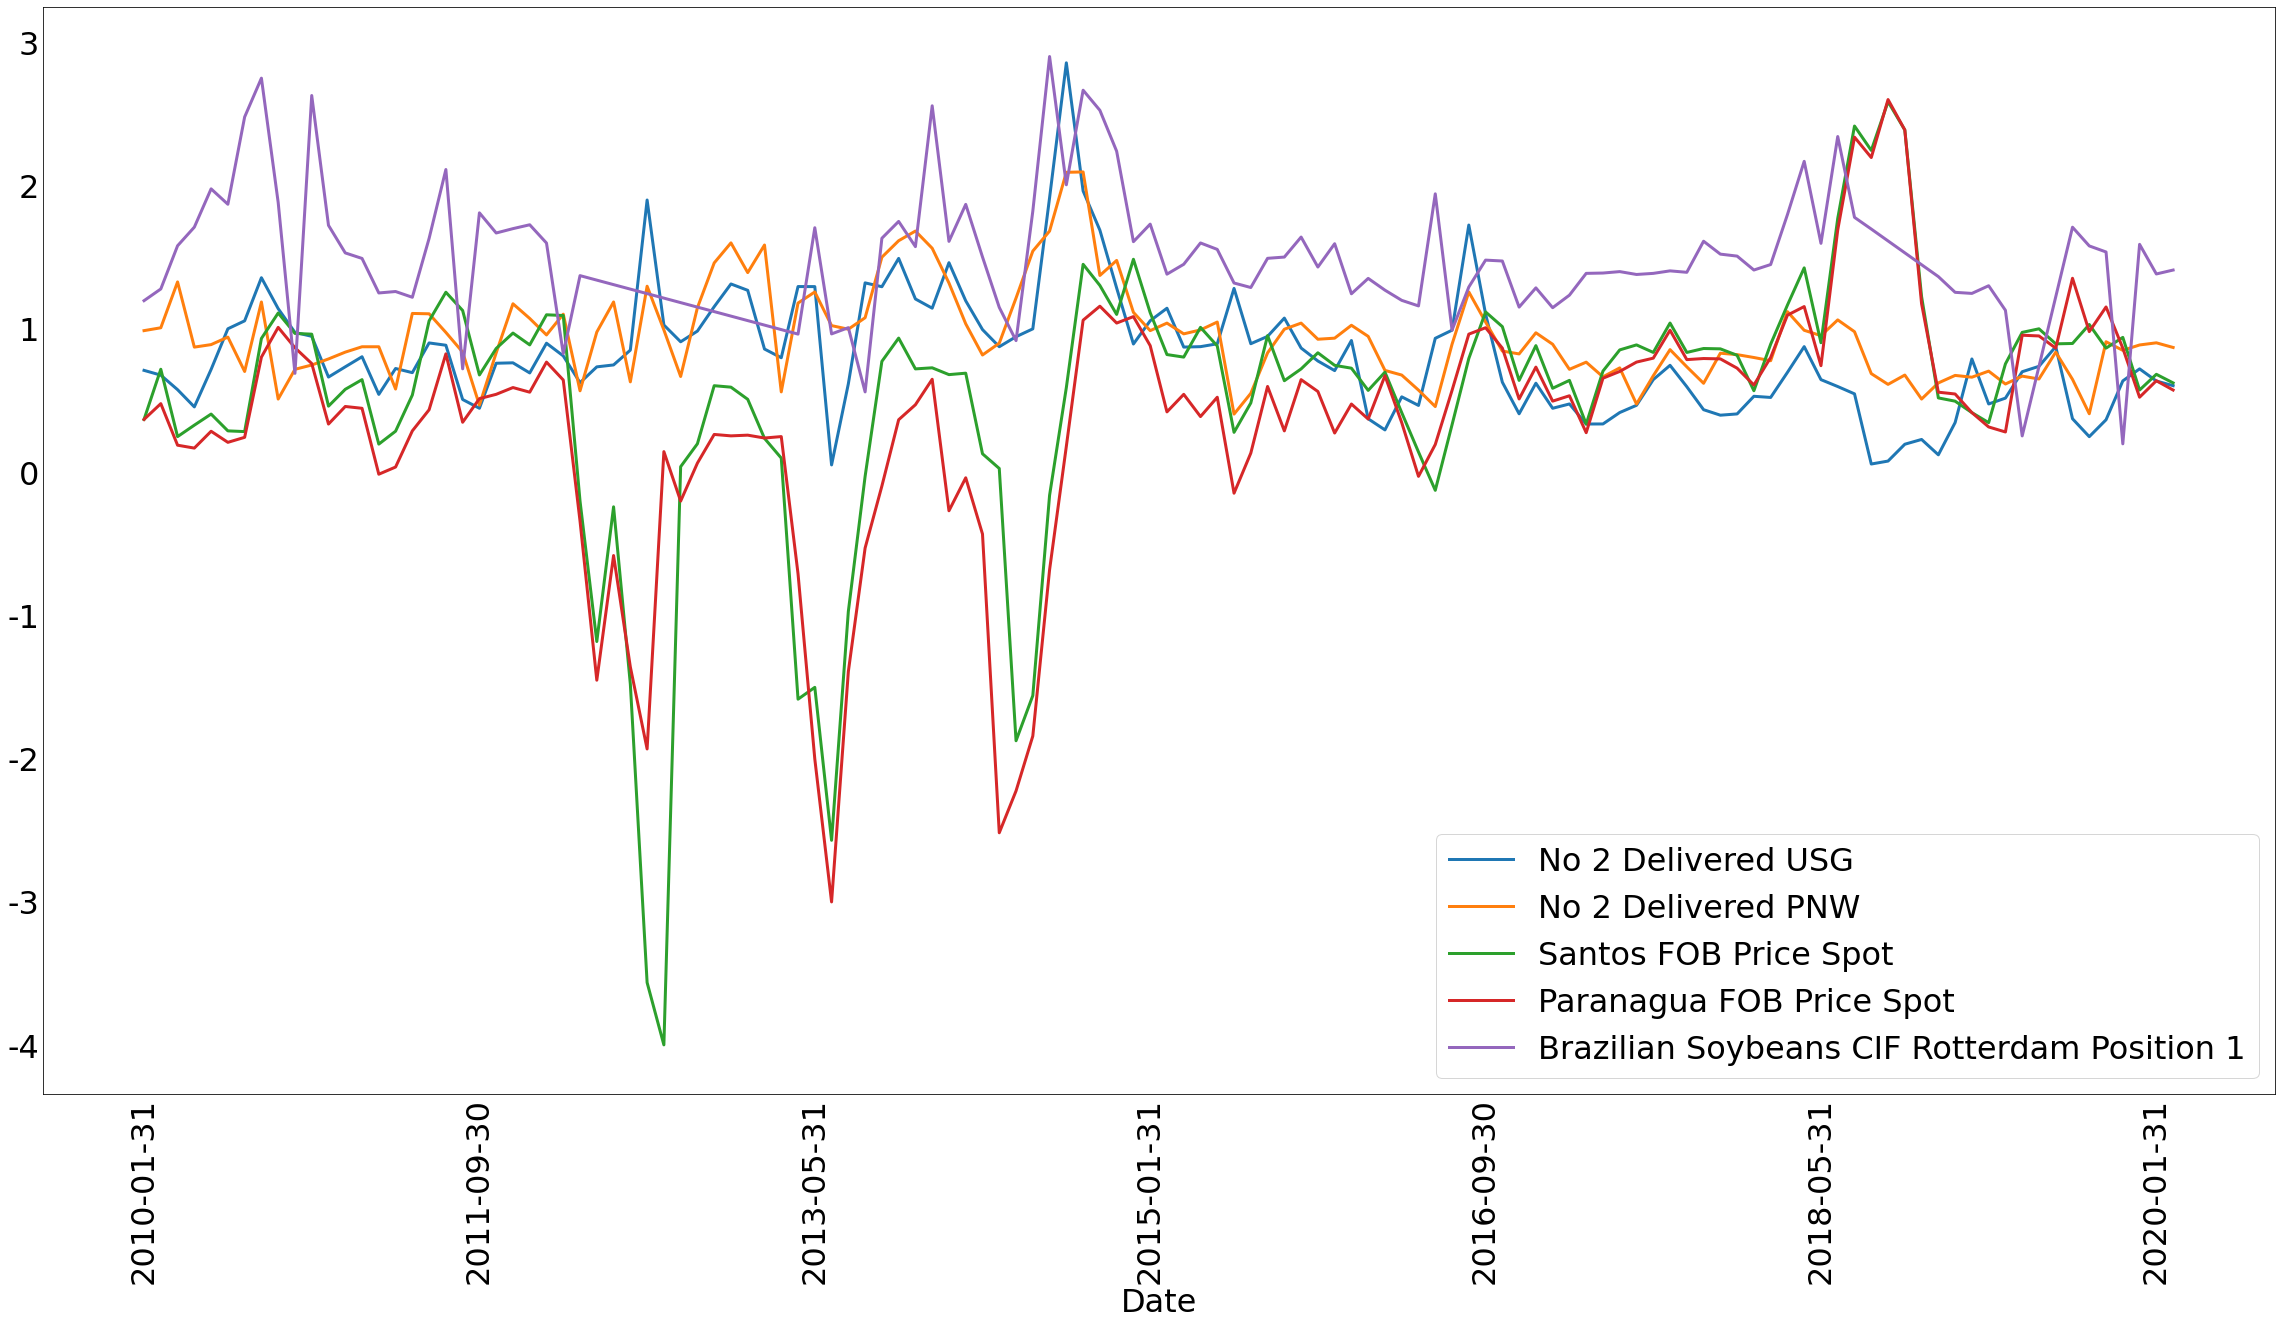

In [12]:
data = pd.read_csv("Port_Basis_CalculatedcleanedData.csv", index_col = ["Date"])
scatter_cats = ["No 2 Delivered USG", "No 2 Delivered PNW", "Santos FOB Price Spot", "Paranagua FOB Price Spot", "Brazilian Soybeans CIF Rotterdam Position 1"]
select_data = data[scatter_cats]

plt.rcParams.update({"font.size":32})
basis_vars = ["No 2 Delivered USG", "No 2 Delivered PNW", "Santos FOB Price Spot", "Paranagua FOB Price Spot", "Brazilian Soybeans CIF Rotterdam Position 1"]
plot_lines(df = data[basis_vars], linewidth = 3, figsize = (40, 20), pp = None)

Again, the extreme volatility that Brazilian ports suffer compared to the U.S. is demonstrated.

In [26]:
from datlib.stats import *

data = pd.read_csv("Origin_Basis_Calculatedstats.csv", index_col = ["stats"])
basis_vars_stats = ["Ayr, ND", "Alberta, MN", "Jasper, MN", "Ida Grove, IA", "St. Joseph, MO", "Barreirias", "Sorriso", "Rio Verde", "Ponta Grossa", "Rondonopolis"]
select_data = data[basis_vars_stats]
data[basis_vars_stats]

,"Ayr, ND","Alberta, MN","Jasper, MN","Ida Grove, IA","St. Joseph, MO",Barreirias,Sorriso,Rio Verde,Ponta Grossa,Rondonopolis
stats,,,,,,,,,,
mean,-0.978150,-0.732361,-0.671688,-0.553500,-0.315912,-0.959260,-1.779168,-0.795983,0.007231,-0.993789
median,-0.960000,-0.797500,-0.763750,-0.627500,-0.352500,-0.828750,-1.701250,-0.797500,-0.065000,-0.991250
variance,0.077112,0.086952,0.130583,0.105433,0.124772,0.810376,1.469600,1.139965,0.653947,1.227211
standard deviation,0.277788,0.294980,0.361490,0.324819,0.353355,0.900526,1.212697,1.068067,0.808955,1.108185
skewness,0.000028,0.000019,0.000039,0.000001,0.000004,0.000977,0.000798,0.000409,0.000007,0.000317
kurtosis,12303.066700,18180.667350,19075.739370,16874.230270,10711.270860,6080.959447,4395.146932,4680.811810,6039.443084,4283.436997


These statistics for the origin basis values were made by #excelImport.py and will be further analyzed.

In [40]:
from datlib.stats import *

data = pd.read_csv("Origin_Basis_CalculatedcleanedData.csv", index_col = ["Date"])
basis_vars = ["Ayr, ND", "Alberta, MN", "Jasper, MN", "Ida Grove, IA", "St. Joseph, MO", "Barreirias", "Sorriso", "Rio Verde", "Ponta Grossa", "Rondonopolis"]
select_data = data[basis_vars]
data[basis_vars]

,"Ayr, ND","Alberta, MN","Jasper, MN","Ida Grove, IA","St. Joseph, MO",Barreirias,Sorriso,Rio Verde,Ponta Grossa,Rondonopolis
Date,,,,,,,,,,
2013-01-02,-0.5350,-0.2050,-0.4050,-0.3350,0.0850,1.6550,-2.3850,-1.2450,1.0550,-0.8050
2013-01-07,-0.5675,-0.4775,-0.4875,-0.3875,-0.0075,0.3125,-3.4675,-0.9075,0.6325,-2.1775
2013-01-08,-0.6175,-0.5275,-0.5375,-0.4375,-0.0575,-0.2975,-3.5175,-1.7975,-0.2375,-2.4675
2013-01-11,-0.8175,-0.7675,-0.7675,-0.6775,-0.2975,-0.0175,-3.6975,-1.7275,-0.4075,-2.8875
2013-01-14,-0.7175,-0.5675,-0.6675,-0.5775,-0.1975,-0.1575,-3.8775,-2.3975,-0.6475,-2.7475
...,...,...,...,...,...,...,...,...,...,...
2019-12-26,-0.9975,-0.6875,-0.5675,-0.5375,-0.2675,-0.1075,-0.6275,-0.0175,0.0125,-0.2575
2019-12-27,-0.9950,-0.6850,-0.5450,-0.5050,-0.1850,0.0350,-0.5250,0.0850,0.0950,-0.1550
2019-12-30,-0.9950,-0.6450,-0.5450,-0.4950,-0.2050,0.0150,-0.5450,0.0650,0.1650,-0.1750


In [41]:
price_change_data = data[basis_vars].pct_change() * 100
price_change_data

,"Ayr, ND","Alberta, MN","Jasper, MN","Ida Grove, IA","St. Joseph, MO",Barreirias,Sorriso,Rio Verde,Ponta Grossa,Rondonopolis
Date,,,,,,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-07,6.074766,132.926829,20.370370,15.671642,-108.823529,-81.117825,45.387841,-27.108434,-40.047393,170.496894
2013-01-08,8.810573,10.471204,10.256410,12.903226,666.666667,-195.200000,1.441961,98.071625,-137.549407,13.318025
2013-01-11,32.388664,45.497630,42.790698,54.857143,417.391304,-94.117647,5.117271,-3.894298,71.578947,17.021277
2013-01-14,-12.232416,-26.058632,-13.029316,-14.760148,-33.613445,800.000000,4.868154,38.784370,58.895706,-4.848485
...,...,...,...,...,...,...,...,...,...,...
2019-12-26,-0.250000,1.102941,-0.438596,-0.462963,-10.833333,-23.214286,2.868852,-inf,-37.500000,3.000000
2019-12-27,-0.250627,-0.363636,-3.964758,-6.046512,-30.841121,-132.558140,-16.334661,-585.714286,660.000000,-39.805825
2019-12-30,0.000000,-5.839416,0.000000,-1.980198,10.810811,-57.142857,3.809524,-23.529412,73.684211,12.903226


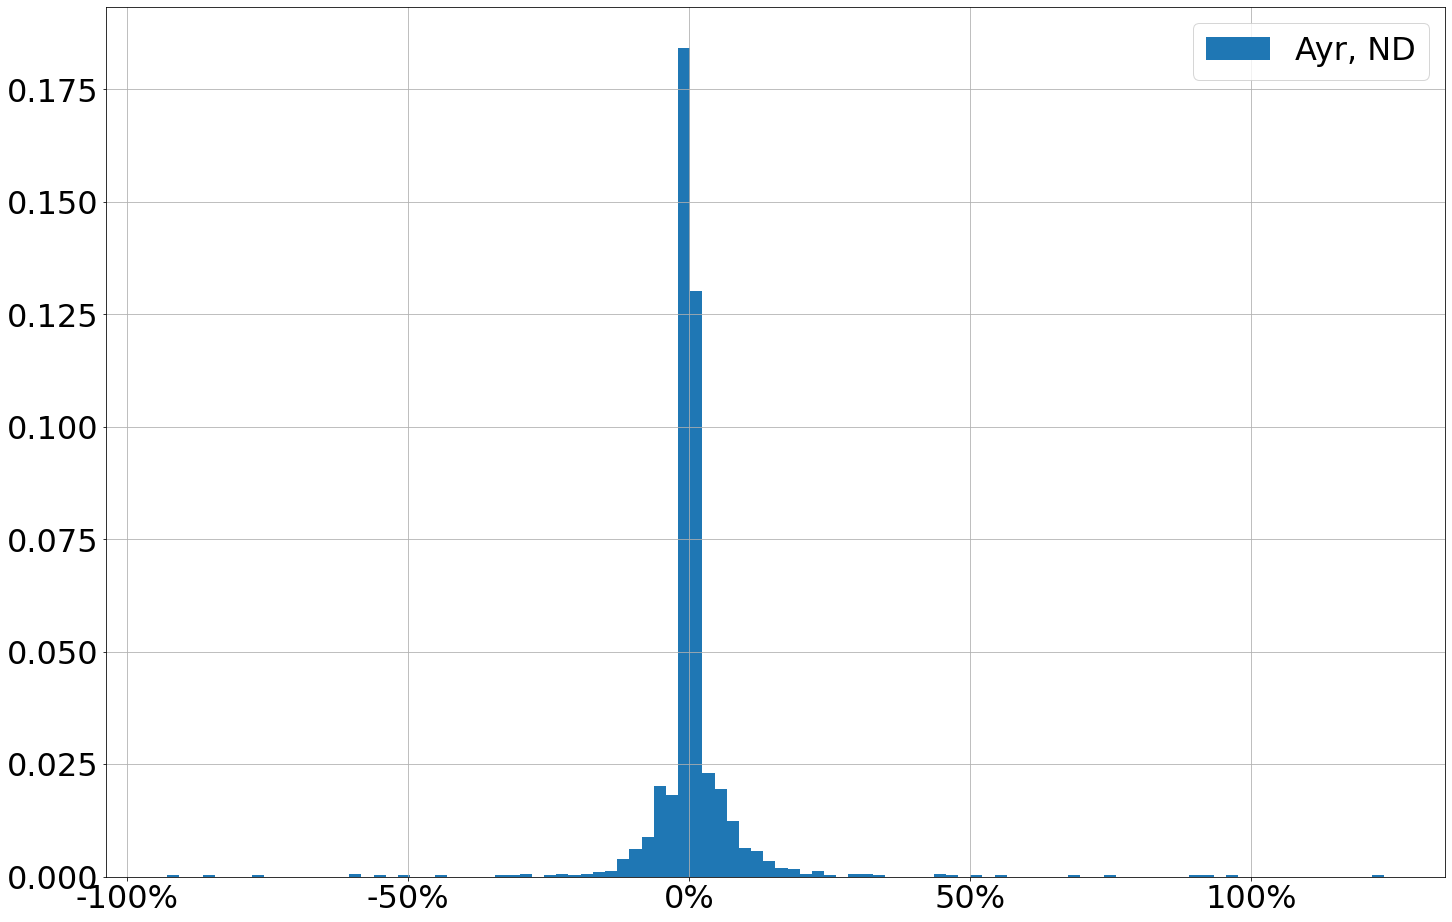

In [43]:
fig, ax = plt.subplots(figsize = (24, 16))
price_change_data["Ayr, ND"].hist(bins = 100, label = "Ayr, ND",
                                density = True)
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x)) + "%" for x in x_vals])
plt.legend()

This is the distribution of the percent change for Ayr, ND. The project will involve analyzing the distributions for many or all of the data variables. 

## Sample Correlation Matrix

Below is a sample of the data, specifically a correlation map of the ocean freight variables. Correlation matrices will prove useful in the project to determine how much an increase in one variable will be followed by another.

In [13]:
#ExcelImport.py
#Also employs stats.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datlib.stats import *

data = pd.ExcelFile("Gwen_Project_Data.xlsx")#, sheet_name="Full data", index_col = [0,2])
names = list(data.sheet_names)
data_dct = {}

for name in names:
    #save sheet in dictionary under same name
     data_dct[name] = data.parse(name, index_col="Date")
     
     # problem: dataframe values are strings
     # solution: for each column, transfomr using pd.to_numeric
     for col, val in data_dct[name].items():
         # for each column - col - in the dataframe save under data_dct[name],
         # transform all values to numeric values. erorrs will return np.nan
         data_dct[name][col] = pd.to_numeric(val, errors = "coerce")         
print(data_dct)

for name in names:
    
    stats_dict = {}
    cov_dict = {}
    corr_dict = {}
    # drop null values or else statistics return nan result
    df = data_dct[name].dropna()
    # call column name in df for statistics that only require one variable
    for key1 in df:
        vec1 = df[key1]
        stats_dict[key1] = {}
        stats_dict[key1]["mean"] = mean(vec1)
        stats_dict[key1]["median"] = median(vec1)
        stats_dict[key1]["variance"] = variance(vec1)
        stats_dict[key1]["standard deviation"] = SD(vec1, sample = True)
        stats_dict[key1]["skewness"] = skewness(vec1, sample = True)
        stats_dict[key1]["kurtosis"] = kurtosis(vec1, sample = True)
        cov_dict[key1] = {}
        corr_dict[key1] = {}
        # call column from df for each cov/corr statistic
        for key2 in df:
            vec2 = df[key2]
            cov_dict[key1][key2] =covariance(vec1, vec2, sample = True)
            corr_dict[key1][key2] = correlation(vec1, vec2)
            
    #convert stats, cov, and corr dictionaries to pandas DataFrames
    stats_DF = pd.DataFrame(stats_dict)
    cov_DF = pd.DataFrame(cov_dict).sort_index(axis = 1)
    corr_DF = pd.DataFrame(corr_dict).sort_index(axis = 1)
    
    
    #output DataFrames to CSV
    stats_DF.to_csv(name + "stats.csv")
    cov_DF.to_csv(name + "covMatrix.csv")
    corr_DF.to_csv(name + "corrMatrix.csv")

{'Origin_Basis_Calculated':             Ayr, ND  Alberta, MN  Jasper, MN  Ida Grove, IA  St. Joseph, MO  \
Date                                                                          
2013-01-02  -0.5350      -0.2050     -0.4050        -0.3350          0.0850   
2013-01-03  -0.5600          NaN     -0.4300        -0.3700          0.0500   
2013-01-04  -0.6200      -0.4700     -0.4900        -0.3800          0.0000   
2013-01-07  -0.5675      -0.4775     -0.4875        -0.3875         -0.0075   
2013-01-08  -0.6175      -0.5275     -0.5375        -0.4375         -0.0575   
...             ...          ...         ...            ...             ...   
2019-12-27  -0.9950      -0.6850     -0.5450        -0.5050         -0.1850   
2019-12-30  -0.9950      -0.6450     -0.5450        -0.4950         -0.2050   
2019-12-31  -0.9700      -0.6400     -0.5500        -0.5000         -0.2400   
2020-01-02  -0.8825      -0.6325     -0.5325        -0.5025         -0.2425   
2020-01-03  -0.8850     

In [14]:
data = pd.read_csv("Ocean_RatecleanedData.csv", index_col = ["Date"])
scatter_cats = ["USG to China", "PNW to China", "Brazil Panama Canal to China", "Brazil Cape Hope to China"]
select_data = data[scatter_cats]

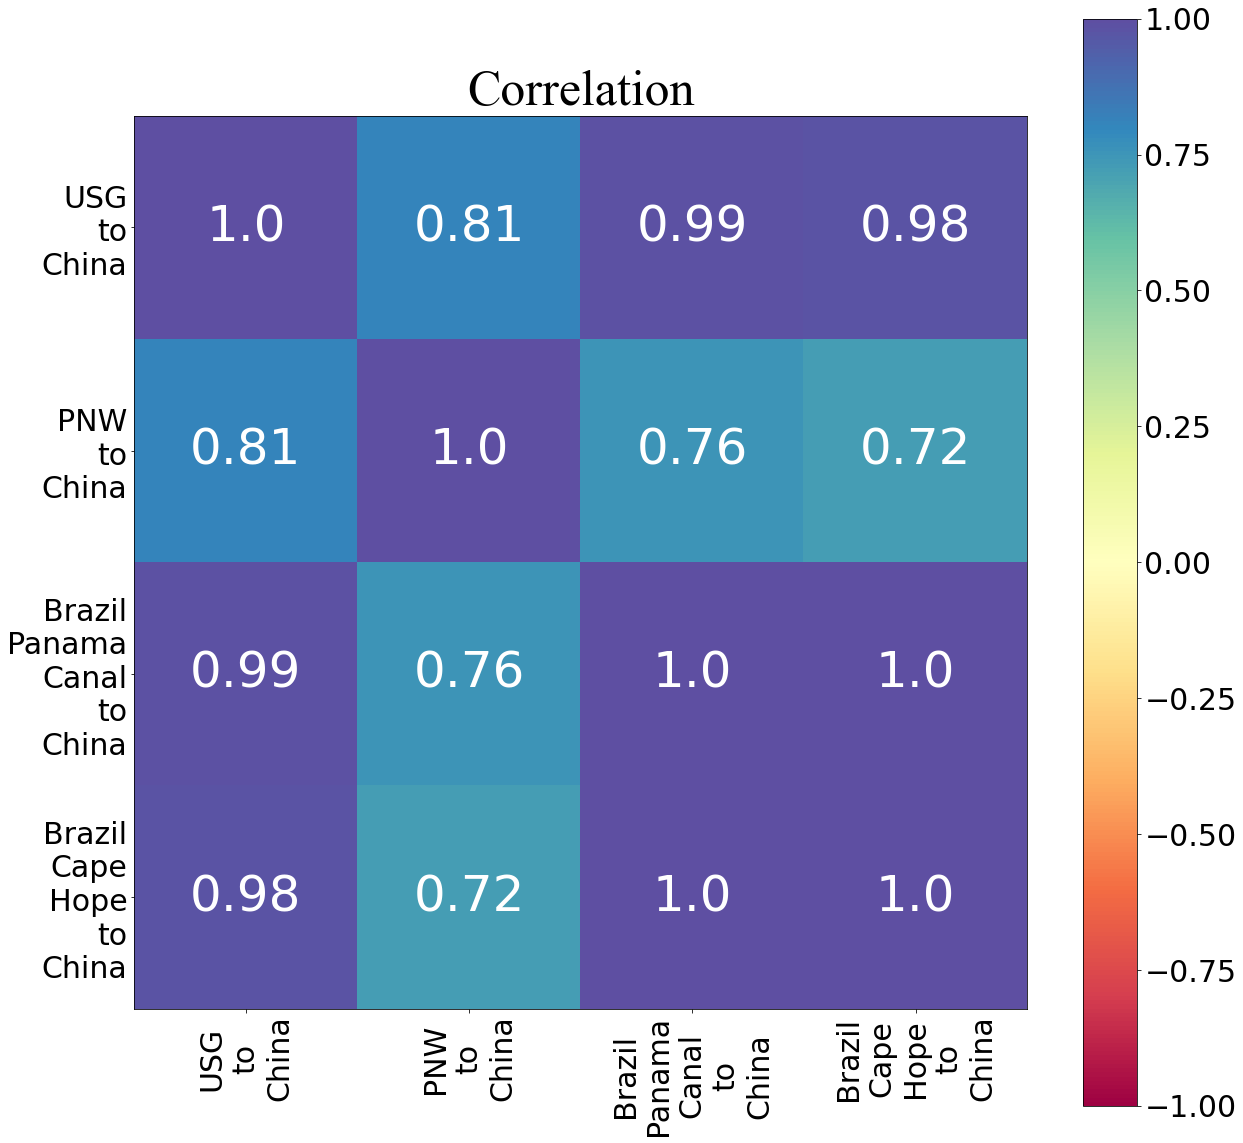

In [15]:
from matplotlib.backends.backend_pdf import PdfPages

def corr_matrix_heatmap(data, pp):  
    #Create a figure to visualize a corr matrix  
    fig, ax = plt.subplots(figsize=(20,20))  
    # use ax.imshow() to create a heatmap of correlation values  
    # seismic mapping shows negative values as blue and positive values as red  
    im = ax.imshow(data, norm = plt.cm.colors.Normalize(-1,1), cmap = "Spectral")  
    # create a list of labels, stacking each word in a label by replacing " "  
    # with "\n"  
    labels = data.keys()  
    num_vars = len(labels)  
    tick_labels = [lab.replace(" ", "\n") for lab in labels]  
    # adjust font size according to the number of variables visualized  
    tick_font_size = 120 / num_vars  
    val_font_size = 200 / num_vars  
    plt.rcParams.update({'font.size': tick_font_size}) 
    # prepare space for label of each column  
    x_ticks = np.arange(num_vars)  
    # select labels and rotate them 90 degrees so that they are vertical  
    plt.xticks(x_ticks, tick_labels, fontsize = tick_font_size, rotation = 90)  
    # prepare space for label of each row  
    y_ticks = np.arange(len(labels))  
    # select labels  
    plt.yticks(y_ticks, tick_labels, fontsize = tick_font_size)  
    # show values in each tile of the heatmap  
    for i in range(len(labels)):  
        for j in range(len(labels)):  
            text = ax.text(i, j, str(round(data.values[i][j],2)),  
                           fontsize= val_font_size, ha="center",   
                           va="center", color = "w")  
    #Create title with Times New Roman Font  
    title_font = {"fontname":"Times New Roman"}  
    plt.title("Correlation", fontsize = 50, **title_font)  
    #Call scale to show value of colors 
    cbar = fig.colorbar(im)
    plt.show()
    pp.savefig(fig, bbox_inches="tight")
    plt.close()
    
pp = PdfPages("Gwen Project Corr.pdf")
#. . . 
corr_data = pd.read_csv("Ocean_RatecorrMatrix.csv", index_col = [0])
select_corr_data = corr_data.loc[scatter_cats][scatter_cats]
corr_matrix_heatmap(select_corr_data, pp)

This map will prove useful. Brazil soybeans sent south of Cape Hope are 98% correlated in ocean freight cost with U.S. soybeans sent from the Gulf around Cape Hope to China. There is a significantly larger distance from the USG to China compared to Santos or Paranagua but it must be not be significant for ocean shipppers.

The PNW to China rate and the USG to China rate are 81% correlated, meaning there must not be a huge advantage to sending U.S. beans to either port, at least according to ocean freight. There could be a change for arbitrage elsewhere.

Both of the rates from Brazil to China, whether through the Panama Canal or around Cape Hope.